# Estación Cuatro Caminos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_38.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,52.903226
2013-02-01,43.451613
2013-03-01,34.935484
2013-04-01,35.612903
2013-05-01,34.870968


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

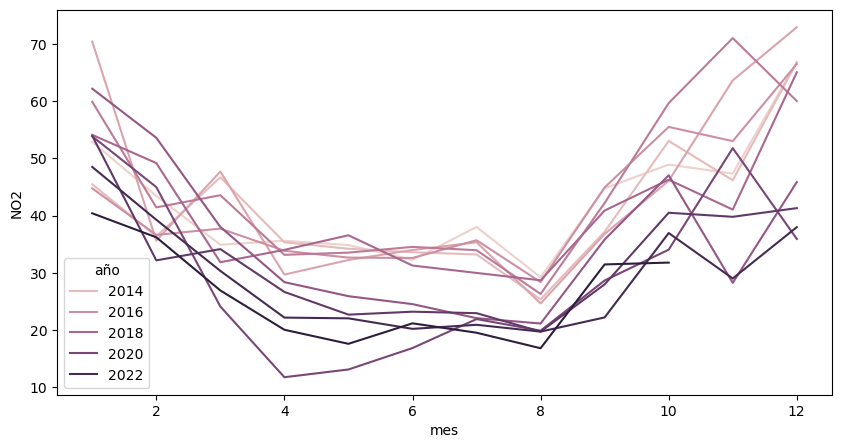

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

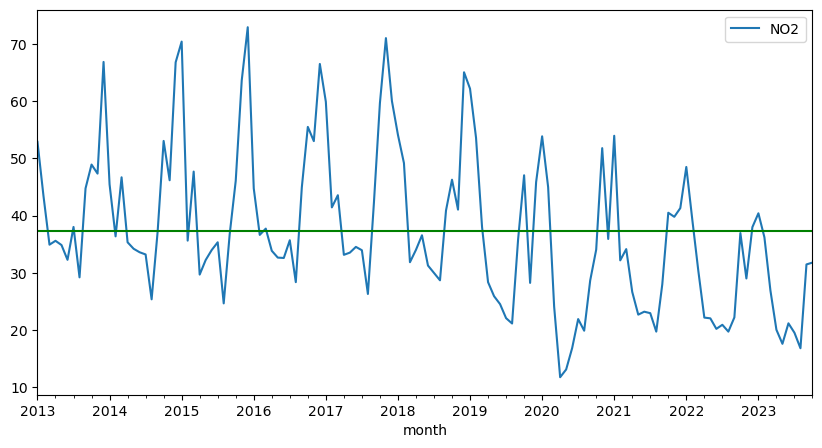

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

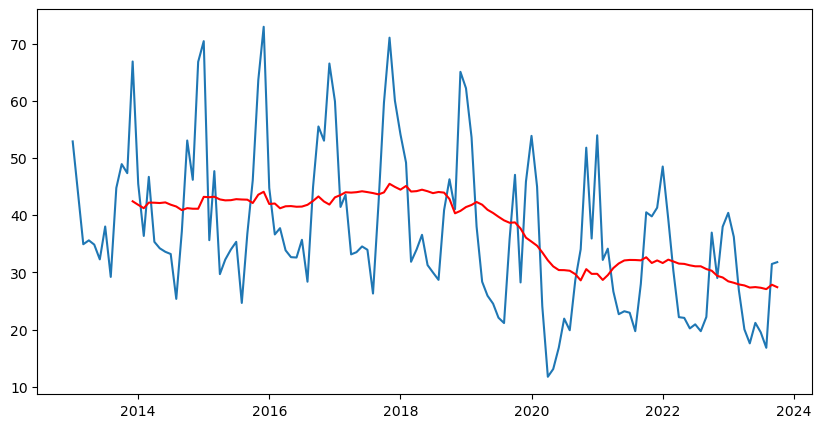

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(0.17985699483588177,
 0.9711089335577457,
 12,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 806.2001082161138)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats 0.17985699483588177
p-value 0.9711089335577457
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6876305690033362
2 mes Lag, 0.43405076079077326
3 mes Lag, 0.1906859629330851
4 mes Lag, -0.0890838770546133
5 mes Lag, -0.24023307491294663
6 mes Lag, -0.29162719484878424
7 mes Lag, -0.27542882372918465
8 mes Lag, -0.10714582585160627
9 mes Lag, 0.16090967749918825
10 mes Lag, 0.4233469206077268
11 mes Lag, 0.6527824939058794
12 mes Lag, 0.8007780558962515
13 mes Lag, 0.6827800761527126
14 mes Lag, 0.41397931363783835
15 mes Lag, 0.15837025831052995
16 mes Lag, -0.1363671441513418
17 mes Lag, -0.32500965410675475
18 mes Lag, -0.3647837971175909
19 mes Lag, -0.34787609898830957
20 mes Lag, -0.1827441093022147
21 mes Lag, 0.09381571253777127
22 mes Lag, 0.3155453376944254
23 mes Lag, 0.6239112206039382
24 mes Lag, 0.7632756332017686
25 mes Lag, 0.6139345128917827
26 mes Lag, 0.39677454170256143
27 mes Lag, 0.13330801641912052
28 mes Lag, -0.1754263406653733
29 mes Lag, -0.3617694037501083
30 mes Lag, -0.42676423532728885
31 mes Lag, -0.3951134411450456
32 me

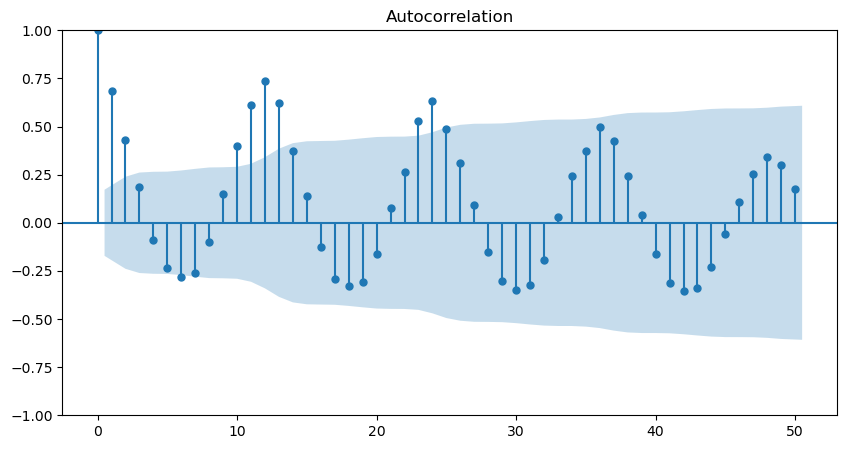

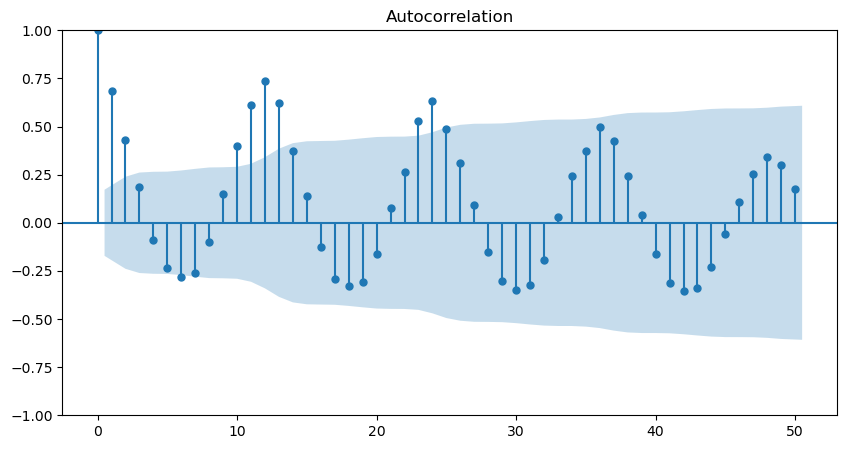

In [14]:
plot_acf(df, lags = 50)

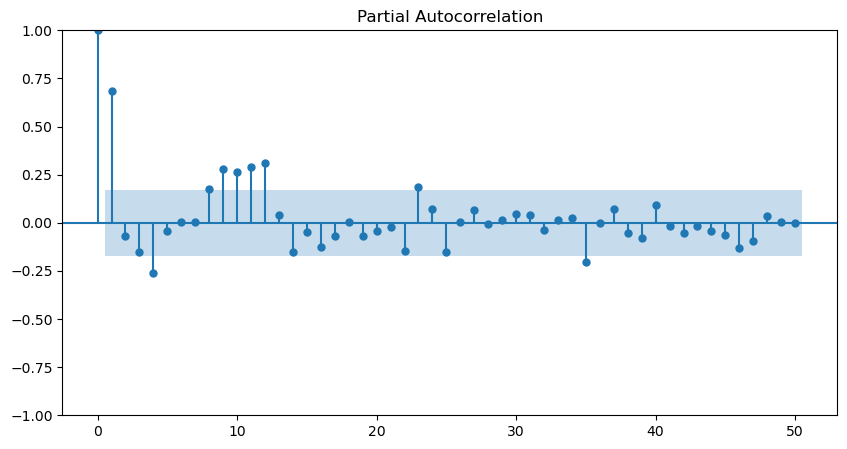

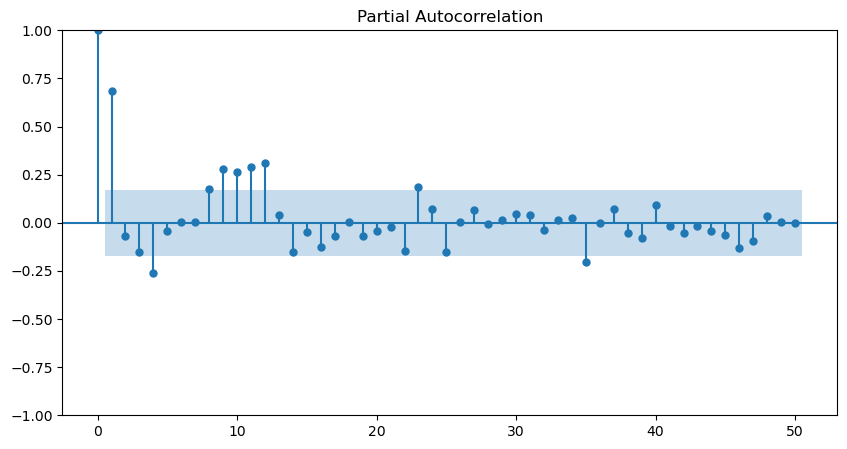

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,52.903226
2013-02-01,43.451613
2013-03-01,34.935484
2013-04-01,35.612903
2013-05-01,34.870968


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 3, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  5.323720509630958
CPU times: total: 328 ms
Wall time: 7.5 s


,real,pred,error
2021-05-01,22.709677,23.310659,0.600982
2021-06-01,23.225806,23.400775,0.174968
2021-07-01,22.967742,24.127888,1.160146
2021-08-01,19.741935,22.006304,2.264369
2021-09-01,28.000000,33.687482,5.687482
2021-10-01,40.516129,42.949828,2.433699
2021-11-01,39.806452,42.112726,2.306274
2021-12-01,41.322581,47.018035,5.695455
2022-01-01,48.516129,60.475005,11.958876
2022-02-01,39.290323,39.447575,0.157253


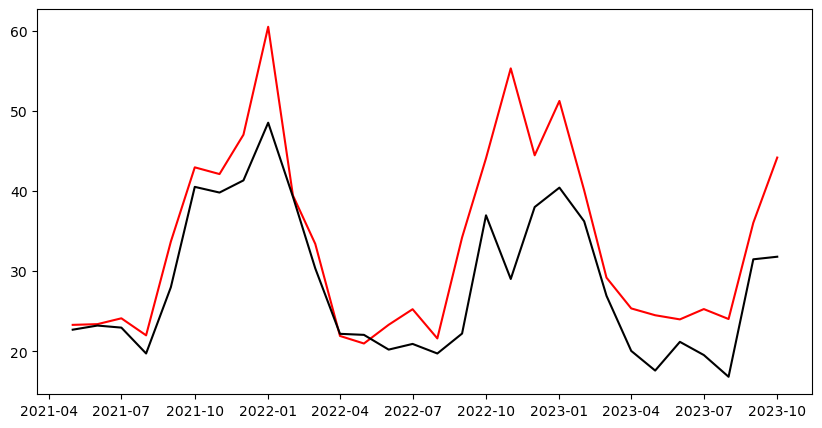

In [22]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [23]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,46.945396
2023-12-01,47.261306
2024-01-01,60.858998
2024-02-01,44.581701
2024-03-01,32.955767
2024-04-01,26.376596
2024-05-01,24.287083
2024-06-01,23.754271
2024-07-01,23.796898
2024-08-01,22.292440


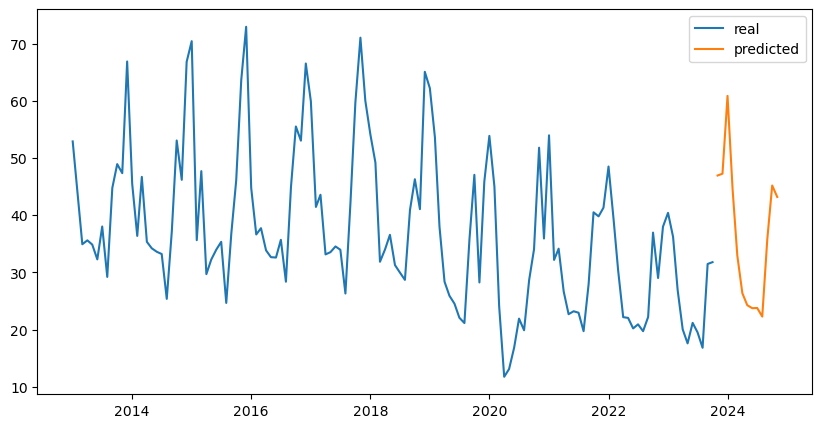

In [24]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [25]:
pred_año.mean()

predicted_mean    36.717876
dtype: float64